In [3]:
'''# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'tuberculosis-tb-chest-xray-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F891819%2F2332307%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240211%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240211T195646Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D7afcc0aa529562bf6aca8bde43c7b0b027e12043d501cf82e452fcb7a78a684df1d8355c9501bb06b86261f0d931f5550c6433d0906e4d0c0f1bc888d67f5d3c41201a0ccbde83d2197660f4bec1d10859609f27f9c6237fde2b6cb094a676645d5e139c36ed1e2a255b09efe190049771ff7e476fc1345aa7911ad535f07119cd15a672609aab96d43a33e53d4ebed989f96af9b02b5b0713079411141d591971fe7e718305afc549e2424ced387c049b3f08ae7d92f5df6f9e5ad68b351627b521518176f6094bdc2ed3cf7a564d4dbfeea221a0f0c0fbe47eb7f9b76b15f2a6ef61bb28f5d829f20b88100492f25f1d0a1a76523bc3c71f5035ddec20f07e'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')'''

'# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES\n# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,\n# THEN FEEL FREE TO DELETE THIS CELL.\n# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE\'S PYTHON\n# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR\n# NOTEBOOK.\n\nimport os\nimport sys\nfrom tempfile import NamedTemporaryFile\nfrom urllib.request import urlopen\nfrom urllib.parse import unquote, urlparse\nfrom urllib.error import HTTPError\nfrom zipfile import ZipFile\nimport tarfile\nimport shutil\n\nCHUNK_SIZE = 40960\nDATA_SOURCE_MAPPING = \'tuberculosis-tb-chest-xray-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F891819%2F2332307%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240211%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240211T195646Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog

In [4]:
'''from google.colab import drive
drive.mount('/content/drive')'''

"from google.colab import drive\ndrive.mount('/content/drive')"

In [5]:
import numpy as np

data = np.load("/content/drive/MyDrive/augmented_data.npz")
tb_augmented = data["images"]
target_tb_augmented = data["labels"]

In [6]:
tb_augmented.shape

(3500, 128, 128, 3)

In [7]:
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
def show_image(images, target, title, num_display=16, num_cols=4, cmap='gray', random_mode=False):
    '''
    :Parameters
        images (ndarray (n,)): Input data as a numpy array.
        target (ndarray (n,)): Target data as a numpy array.
        title (String): Title of the plot.
        num_display (int): Number of images to display. Default is 16.
        num_cols (int): Number of columns in the plot. Default is 4.
        cmap (str): Color map for displaying images. Default is 'gray'.
        random_mode (bool): If True, display images randomly. If False, display the first num_display images. Default is False.
    '''
    # Determine the number of rows based on the num_cols parameter
    n_cols = min(num_cols, num_display)
    n_rows = int(np.ceil(num_display / n_cols))

    n_images = min(num_display, len(images))
    if random_mode:
        random_indices = np.random.choice(
            len(images), num_display, replace=False)
    else:
        random_indices = np.arange(num_display)

    fig, axes = plt.subplots(
        nrows=n_rows, ncols=n_cols, figsize=(20, 4*n_rows))
    for i, ax in enumerate(axes.flatten()):
        if i >= n_images:  # Check if the index exceeds the available number of images
            break
        # Incase (Did PCA)
        index = random_indices[i]
        if len(images.shape) == 2:
            image = images[index].reshape((128, 128)).astype(int)
        else:
            image = images[index]

        ax.imshow(image, cmap=cmap)
        ax.set_title("Target: {}".format(target[index]))

        # Add image index as text
        ax.text(0.5, -0.15, f'Image Index: {index}', transform=ax.transAxes,
                fontsize=10, ha='center')

    plt.suptitle(f"{title} (Displaying {num_display} Images)",
                 fontsize=16, fontweight='bold')

    fig.set_facecolor('white')
    plt.tight_layout()
    return plt.show()

In [9]:
'''show_image(images=tb_augmented[700:-1],
           target=target_tb_augmented[700:-1],
           title='Augmented Tuberculosis data',
           num_display=64,
           num_cols=8,
           cmap='gray',
           random_mode=False)'''

"show_image(images=tb_augmented[700:-1],\n           target=target_tb_augmented[700:-1],\n           title='Augmented Tuberculosis data',\n           num_display=64,\n           num_cols=8,\n           cmap='gray',\n           random_mode=False)"

In [10]:
'''for i in range(1,5):
    image = Image.open(
        f'../input/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database/Normal/Normal-{i}.png')
    print(image.mode)
    print(image.size)
    plt.imshow(image)
    plt.show()'''

"for i in range(1,5):\n    image = Image.open(\n        f'../input/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database/Normal/Normal-{i}.png')\n    print(image.mode)\n    print(image.size)\n    plt.imshow(image)\n    plt.show()"

In [11]:
import numpy as np
from numpy import asarray
import os
from tqdm import tqdm

In [12]:
dir_path = '../input/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database/'

In [13]:
def numpize(subset: str, img_size=(128, 128), grayscale=False):
    """
    Convert a set of images from a specified subset to NumPy arrays.

    Parameters:
    - subset (str): Specifies the subset of images, e.g., 'Normal' or 'Tuberculosis'.
    - img_size (tuple): Tuple representing the desired size of the images after resizing.
    - grayscale (bool): If True, convert images to grayscale.

    Returns:
    - numpy_array (numpy.ndarray): NumPy array containing the transformed images.
    """
    image_dir = f'{dir_path}/{subset}/'
    image_files = os.listdir(image_dir)
    image_count = len(image_files)
    transformed_images = []

    for i in tqdm(range(1, image_count + 1), desc='Transforming...'):
        image_path = f'{image_dir}/{subset}-{i}.png'
        image = Image.open(image_path)

        # Ensure all images are in the same format
        if grayscale:
            image = image.convert('L')  # Convert to grayscale
        else:
            image = image.convert('RGB')  # Convert to RGB

        # Resize all images to the specified size without padding
        resized_image = image.resize(img_size)
        data = np.asarray(resized_image)
        transformed_images.append(data)

    numpy_array = np.array(transformed_images)
    return numpy_array

In [16]:
norm = numpize(subset='Normal',
               img_size=(128, 128),
               grayscale=False)
norm.shape

'''file_path = "/content/drive/MyDrive/norm_array.npy"
np.save(file_path, norm)'''

Transforming...: 100%|██████████| 3500/3500 [01:07<00:00, 52.23it/s]


'file_path = "/content/drive/MyDrive/norm_array.npy"\nnp.save(file_path, norm)'

In [17]:
tb = numpize(subset='Tuberculosis',
             img_size=(128, 128),
             grayscale=False)
tb.shape
file_path1 = "/content/drive/MyDrive/tb_array.npy"
np.save(file_path1, norm)

Transforming...: 100%|██████████| 700/700 [00:09<00:00, 73.01it/s]


In [20]:
norm = np.load("/content/drive/MyDrive/norm_array.npy")
norm.shape

(3500, 128, 128, 3)

In [21]:
tb = np.load("/content/drive/MyDrive/tb_array.npy")
tb.shape

(3500, 128, 128, 3)

In [22]:
X = np.concatenate((norm, tb_augmented), axis=0)

In [23]:
target_norm = np.zeros(norm.shape[0])
print(f'Shape: {target_norm.shape[0]}, array: {target_norm}')

Shape: 3500, array: [0. 0. 0. ... 0. 0. 0.]


In [24]:
y = np.concatenate((target_norm,  target_tb_augmented), axis=0)

In [25]:
X.shape

(7000, 128, 128, 3)

In [26]:
y.shape

(7000,)

In [27]:
import pandas as pd

In [28]:
y_df = pd.DataFrame(y)
y_df.value_counts()

0.0    3500
1.0    3500
dtype: int64

In [29]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dropout, Dense

In [30]:
class CNN:
    def __init__(self,
                 input_shape=(128, 128, 3),
                 unit_size_rate=0.05,
                 conv_padding='same',
                 conv_kernel_size=(3, 3),
                 conv_stride=1,
                 pool_padding='same',
                 pool_kernel_size=(2, 2),
                 pool_stride=2,
                 dropout=0,
                 l1_lambda=None,
                 l2_lambda=None,
                 pooling_type='max',
                 epochs=5,
                 batch_size=64,
                 verbose=1):
        self.input_shape = input_shape
        self.unit_size_rate = unit_size_rate
        self.conv_padding = conv_padding
        self.conv_kernel_size = conv_kernel_size
        self.conv_stride = conv_stride
        self.pool_padding = pool_padding
        self.pool_kernel_size = pool_kernel_size
        self.pool_stride = pool_stride
        self.dropout = dropout
        self.l1_lambda = l1_lambda
        self.l2_lambda = l2_lambda
        self.pooling_type = pooling_type
        self.epochs = epochs
        self.batch_size = batch_size
        self.verbose = verbose
        self.model = self.build_model()

    def build_model(self):
        reg_l1 = None
        reg_l2 = None

        if self.l1_lambda is not None:
            reg_l1 = tf.keras.regularizers.l1(self.l1_lambda)

        if self.l2_lambda is not None:
            reg_l2 = tf.keras.regularizers.l2(self.l2_lambda)

        if len(self.input_shape) == 2:
            # Add color channel for grayscale images
            self.input_shape = self.input_shape + (1,)

        model = Sequential()
        model.add(Conv2D(
            int(32 * self.unit_size_rate),
            self.conv_kernel_size,
            strides=self.conv_stride,
            padding=self.conv_padding,
            activation='relu',
            kernel_regularizer=reg_l1,
            input_shape=self.input_shape))

        if self.pooling_type == 'max':
            model.add(MaxPooling2D(
                pool_size=self.pool_kernel_size,
                strides=self.pool_stride,
                padding=self.pool_padding))
        elif self.pooling_type == 'avg':
            model.add(AveragePooling2D(
                pool_size=self.pool_kernel_size,
                strides=self.pool_stride,
                padding=self.pool_padding))
        else:
            raise ValueError("Invalid pooling_type. Use 'max' or 'avg'.")

        model.add(Conv2D(
            int(64 * self.unit_size_rate),
            self.conv_kernel_size,
            strides=self.conv_stride,
            padding=self.conv_padding,
            kernel_regularizer=reg_l2,
            activation='relu'))

        if self.pooling_type == 'max':
            model.add(MaxPooling2D(
                pool_size=self.pool_kernel_size,
                strides=self.pool_stride,
                padding=self.pool_padding))
        elif self.pooling_type == 'avg':
            model.add(AveragePooling2D(
                pool_size=self.pool_kernel_size,
                strides=self.pool_stride,
                padding=self.pool_padding))
        else:
            raise ValueError("Invalid pooling_type. Use 'max' or 'avg'.")

        model.add(Conv2D(
            int(128 * self.unit_size_rate),
            self.conv_kernel_size,
            strides=self.conv_stride,
            padding=self.conv_padding,
            kernel_regularizer=reg_l2,
            activation='relu'))

        if self.pooling_type == 'max':
            model.add(MaxPooling2D(
                pool_size=self.pool_kernel_size,
                strides=self.pool_stride,
                padding=self.pool_padding))
        elif self.pooling_type == 'avg':
            model.add(AveragePooling2D(
                pool_size=self.pool_kernel_size,
                strides=self.pool_stride,
                padding=self.pool_padding))
        else:
            raise ValueError("Invalid pooling_type. Use 'max' or 'avg'.")

        model.add(Flatten())
        model.add(Dense(
            units=int(128 * self.unit_size_rate),
            activation='relu',
            kernel_regularizer=reg_l2))

        model.add(Dropout(self.dropout))
        model.add(Dense(units=1, activation='sigmoid'))
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        return model

    def predict(self, X, threshold=0.5, verbose=0):
        return (self.model.predict(X, verbose=verbose) > threshold).astype("int32")

    def summary(self):
        self.model.summary()

    def train(self, X_train, y_train, X_val, y_val, epochs, batch_size, verbose=1):
        history = self.model.fit(
            X_train, y_train,
            batch_size=batch_size if batch_size else self.batch_size,
            epochs=epochs if epochs else self.epochs,
            verbose=verbose,
            validation_data=(X_val, y_val)
        )
        return history

In [31]:
cnn = CNN(unit_size_rate=1,
          input_shape=(128,128,3))

In [32]:
from sklearn.model_selection import train_test_split

In [34]:
def viz_class_distribution(X, y, title, classe_labels, train_percent=0.6, val_percent=0.2, test_percent=0.2):
    '''
    :Parameters:
    - X (numpy array): The input feature matrix of shape (num_examples, num_features).
    - y (numpy array): The target labels of shape (num_examples,).
    - title (str): The title for the entire plot.
    - classes (list): A list of class labels, e.g., ['Normal', 'Tuberculosis'].
    - train_percent (float): Percentage of data for training set.
    - val_percent (float): Percentage of data for validation set.
    - test_percent (float): Percentage of data for test set.

    :Returns:
    - X_train, y_train, X_test, y_test, X_val, y_val: The subsets of the data.
    '''
    assert train_percent + val_percent + test_percent == 1.0, "Sum of train_percent, val_percent, and test_percent should be 1.0"

    # Convert y to integers
    y = y.astype(int)

    # Split the data
    X_train, X_temp, y_train, y_temp = train_test_split(
        X, y, test_size=val_percent + test_percent, random_state=42, stratify=y)

    test_size = test_percent / (val_percent + test_percent)
    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp, test_size=test_size, random_state=42, stratify=y_temp)

    # Create a subplot with 3 columns and 1 row
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    # List of subset names
    subset_names = ['Train', 'Test', 'Validation']
    n = len(X)

    # Iterate over subsets
    for i, subset in enumerate([(X_train, y_train), (X_test, y_test), (X_val, y_val)]):
        X_subset, y_subset = subset
        n_subset = len(y_subset)
        # Get the class counts
        class_counts = np.bincount(y_subset)

        # Plot histogram for the current subset
        axs[i].bar(classe_labels, class_counts, color='#AA99FF')
        subtitle = r'$\bf{' + subset_names[i] + \
            '}$' + f' {int(n_subset/n*100)} %'
        axs[i].set_title(
            subtitle + f'\n Size = {X_subset.shape[0]}', fontsize=18)
        axs[i].set_xlabel('Class')
        axs[i].set_ylabel('Number of examples')

        # Add labels to the bars
        for j, count in enumerate(class_counts):
            axs[i].text(j, count, str(count), ha='center',
                        va='bottom', fontsize=12)

    class_counts = np.bincount(y)
    class_balance_text = ' | '.join(
        [f'{class_label} ({count})' for class_label, count in zip(classe_labels, class_counts)])
    plt.suptitle(f'{title}' + f'\n Training examples (X): {X.shape[0]}' +
                 f'\nTarget (y): {class_balance_text}', fontsize=20)

    plt.tight_layout()
    plt.show()

    return X_train, y_train, X_test, y_test, X_val, y_val

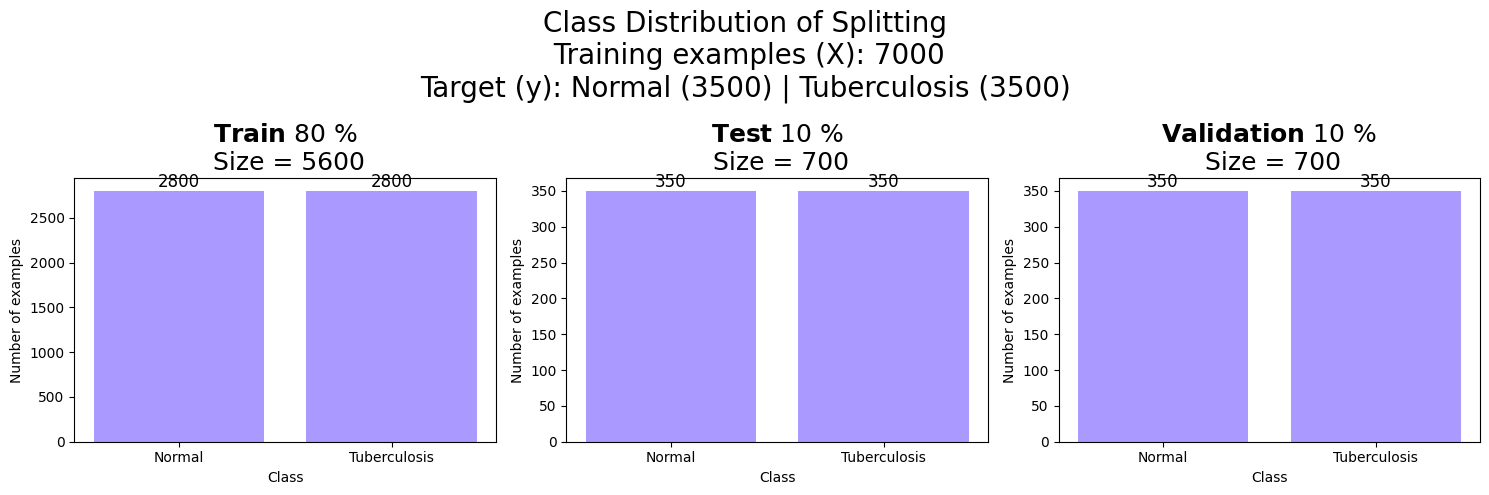

In [35]:
X_train, y_train, X_test, y_test, X_val, y_val = viz_class_distribution(X=X,
                        y=y,
                        title='Class Distribution of Splitting',
                        classe_labels=['Normal', 'Tuberculosis'],
                        train_percent=0.8,
                        val_percent=0.1,
                        test_percent=0.1)

In [36]:
model_config = {
    # (height, width, channels)
    'input_shape': (128, 128,3),
    'unit_size_rate': 0.05,
    'l1_lambda': None,
    'l2_lambda': None,

    'conv_padding': 'same',
    'conv_kernel_size': (3, 3),
    'conv_stride': 1,

    'pool_padding': 'same',
    'pool_kernel_size': (2, 2),
    'pool_stride': 2,

    'dropout': 0,
    'pooling_type': 'max'
}

# Build model
model_1st = CNN(**model_config).build_model()
model_1st.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 128, 128, 1)       28        
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 64, 64, 1)         0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 64, 64, 3)         30        
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 32, 32, 3)         0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 32, 32, 6)         168       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 16, 16, 6)        

In [37]:
import time

In [38]:
optimizer = tf.keras.optimizers.Adam()
optimizer_config= optimizer.get_config()
optimizer_config

{'name': 'Adam',
 'weight_decay': None,
 'clipnorm': None,
 'global_clipnorm': None,
 'clipvalue': None,
 'use_ema': False,
 'ema_momentum': 0.99,
 'ema_overwrite_frequency': None,
 'jit_compile': False,
 'is_legacy_optimizer': False,
 'learning_rate': 0.001,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07,
 'amsgrad': False}

In [ ]:
start_time = time.time()
# verbose is progress bar; verbose = 1 display, verbose = don't display
verbose = 1
# Compile the model
model_1st.compile(loss='binary_crossentropy',
                   optimizer=optimizer,
                   metrics='accuracy')

# Train the model
history = model_1st.fit(X_train, y_train,
                             epochs=30,
                             batch_size=64,
                             validation_data=(X_val, y_val),
                             verbose=verbose)

end_time = time.time()
training_time = end_time - start_time
training_time

In [ ]:
print(f'Training time in minutes: {training_time/60:.2f} minutes')

In [ ]:
def get_history(history,
                model,
                training_time:float,
                ref_name:str,
                title:str):

        best_epoch = np.argmax(history.history['val_accuracy'])
        best_train_epoch = np.argmax(history.history['accuracy'])

        # Create a 1x2 grid of subplots
        fig, axes = plt.subplots(1, 2, figsize=(24, 15))

        # Plot training and validation accuracy
        axes[0].plot(history.epoch, history.history['accuracy'],
                     label='Train Accuracy')
        axes[0].plot(history.epoch, history.history['val_accuracy'],
                     label='Validation Accuracy')
        axes[0].scatter(best_epoch, history.history['val_accuracy']
                        [best_epoch], color='r', label='Best Epoch (Validation)')
        axes[0].scatter(best_train_epoch, history.history['accuracy']
                        [best_train_epoch], color='g', label='Best Epoch (Train)')

        # Annotate the best validation accuracy point
        best_accuracy = history.history['val_accuracy'][best_epoch]
        random_offset_x = 10
        random_offset_y = np.random.randint(-30, 30)
        axes[0].annotate(f'{best_accuracy:.3f}',
                         xy=(best_epoch, best_accuracy),
                         xytext=(random_offset_x, random_offset_y),
                         textcoords='offset points',
                         arrowprops=dict(arrowstyle='->'))

        axes[0].set_xlabel('Epoch')
        axes[0].set_ylabel('Accuracy (%)')
        axes[0].set_title('Training and Validation Accuracy')
        axes[0].legend()

        # Annotate the best training accuracy point
        best_train_accuracy = history.history['accuracy'][best_train_epoch]
        random_offset_y = np.random.randint(-30, 30)
        axes[0].annotate(f'{best_train_accuracy:.3f}',
                         xy=(best_train_epoch, best_train_accuracy),
                         xytext=(random_offset_x, random_offset_y),
                         textcoords='offset points',
                         arrowprops=dict(arrowstyle='->'))

        # Plot training and validation loss
        axes[1].plot(history.epoch,
                    history.history['loss'], label='Train Loss')
        axes[1].plot(history.epoch, history.history['val_loss'],
                     label='Validation Loss')
        axes[1].scatter(best_epoch, history.history['val_loss']
                        [best_epoch], color='r', label='Best Epoch (Validation)')
        axes[1].scatter(best_train_epoch,history.history['loss']
                        [best_train_epoch], color='g', label='Best Epoch (Train)')
        axes[1].set_xlabel('Epoch')
        axes[1].set_ylabel('Loss')
        axes[1].set_title('Training and Validation Loss')
        axes[1].legend()

        # Annotate the best validation loss point
        best_loss = history.history['val_loss'][best_epoch]
        random_offset_y = np.random.randint(-30, 30)
        axes[1].annotate(f'{best_loss:.3f}',
                         xy=(best_epoch, best_loss),
                         xytext=(random_offset_x, random_offset_y),
                         textcoords='offset points',
                         arrowprops=dict(arrowstyle='->'))

        # Annotate the best training loss point
        best_train_loss = history.history['loss'][best_train_epoch]
        random_offset_y = np.random.randint(-30, 30)
        axes[1].annotate(f'{best_train_loss:.3f}',
                         xy=(best_train_epoch, best_train_loss),
                         xytext=(random_offset_x, random_offset_y),
                         textcoords='offset points',
                         arrowprops=dict(arrowstyle='->'))

        # Calculate best validation accuracy in percentage
        best_accuracy_percentage = round(best_accuracy * 100, 2)

        # String for performance, accuracy, and training time
        minutes = int(training_time // 60)
        seconds = int(training_time % 60)

        # model summary
        stringlist = []
        model.summary(print_fn=lambda x: stringlist.append(x))
        short_model_summary = "\n".join(stringlist)

        # Set the text for the parameters on the right side
        performance = r'$\bf{' + f'Ref. name: {ref_name}' + '}$' + f"\nBest Validation Accuracy: {best_accuracy_percentage}%" + \
            f"\nBest Train Accuracy: {history.history['accuracy'][best_train_epoch] * 100:.2f}%" + \
            f", Training Time: {minutes} minutes {seconds} seconds"
        fig.suptitle(r'$\bf{' + title + '}$' +
                     '\n' + performance, fontsize=18)

        fig.text(1.05, 1.00, r'$\bf{' + 'Config Parameters:' + '}$', fontsize=16,
                 color='black', ha='left', transform=plt.gcf().transFigure)

        y_coord = 0.98  # Initial y-coordinate

        # Set the line height between each parameter group and each parameter within a group
        line_height = 0.028

        for group, params in get_config.items():
            fig.text(1.05, y_coord, r'$\bf{' + f'{group}:' + '}$', fontsize=14,
                     color='black', ha='left', transform=plt.gcf().transFigure)
            y_coord -= line_height

            for key, value in params.items():
                fig.text(1.05, y_coord, f"{key}: {value}", fontsize=12,
                         color='black', ha='left', transform=plt.gcf().transFigure)
                y_coord -= line_height

        fig.text(1.05, 0.01, r'$\bf{' + f'Model Summary:' + '}$' + f'\n{short_model_summary}',
                 fontsize=10, color='black', ha='left', transform=plt.gcf().transFigure)

        plt.tight_layout()
        plt.show()

In [ ]:
title = 'Experiment 1: Build 1st CNNs model'
get_history(history=history,
            model=model_1st,
            training_time=training_time,
            title=title,
            ref_name='Original Dataset')

In [ ]:
import json
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, accuracy_score, roc_curve, roc_auc_score, f1_score

In [ ]:
def evaluate(estimator_name, estimator, X, y_actual, subset_name, training_time, threshold=None):

        # Model Prediction/Y hat
        y_pred = estimator.predict(
            X)
        # Handling Output Layer of Activation='sigmoid'
        threshold = threshold if threshold else 0.5
        y_pred_binary = (y_pred > threshold).astype(int).flatten()

        # Calculate ROC curve and AUC score
        fpr, tpr, thresholds = roc_curve(y_actual, y_pred_binary)
        auc_score = roc_auc_score(y_actual, y_pred_binary)
        # Classification Report
        report = classification_report(
            y_actual, y_pred_binary, output_dict=True)
        report_dict = json.loads(json.dumps(report))

        # Extract precision and recall from report_dict
        precision = report_dict['weighted avg']['precision']
        recall = report_dict['weighted avg']['recall']
        accuracy = report_dict['accuracy']
        f1 = report_dict['weighted avg']['f1-score']

        # Confusion Matrix
        cm = confusion_matrix(y_actual, y_pred_binary)
        TP = cm[0][0]
        FP = cm[0][1]
        FN = cm[1][0]
        TN = cm[1][1]
        total_seconds = training_time
        minutes = int(training_time // 60)
        seconds = int(training_time % 60)
        training_time_ = "{} minutes {} seconds".format(minutes, seconds)

        accuracy_train = history.history['accuracy']
        accuracy_val = history.history['val_accuracy']

        performance_info = {
            'Model': estimator_name,
            'accuracy_train': accuracy_train,
            'accuracy_val': accuracy_val,
            'Subset': subset_name,
            'Training time': training_time_,
            'Training in seconds': total_seconds,
            'TP': TP,
            'FP': FP,
            'FN': FN,
            'TN': TN,
            'Precision': precision,
            'Recall': recall,
            'F1': f1,
            'AUC': auc_score,
            'Accuracy': accuracy,
        }
        return pd.DataFrame([performance_info])

In [ ]:
evaluate(estimator_name='CNN',
         estimator=model_1st,
         X=X_train,
         y_actual=y_train,
         subset_name='Training',
         training_time=training_time
         )

In [ ]:
evaluate(estimator_name='CNN',
         estimator=model_1st,
         X=X_test,
         y_actual=y_test,
         subset_name='Test',
         training_time=training_time
         )

In [ ]:
def plot_confusion_matrix(y_actual, y_pred, subset_name):
    y_pred_binary = (y_pred > 0.5).astype(int).flatten()
    cm = confusion_matrix(y_actual, y_pred_binary)
    labels = ['Negative', 'Positive']

    # Extract TP, TN, FP, FN
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn)  # Sensitivity or True Positive Rate
    specificity = tn / (tn + fp)  # Specificity or True Negative Rate

    plt.figure(figsize=(18, 9))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=labels, yticklabels=labels)



    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {subset_name}\n'
              f'True Positives: {tp} | True Negatives: {tn}\n'
              f'False Positives: {fp} (Type I error) | False Negatives: {fn} (Type II error)\n'
              f'Sensitivity (True Positive Rate): {sensitivity:.4f} | Specificity (True Negative Rate): {specificity:.4f}',
              loc='center', wrap=True)
    plt.show()

In [ ]:
plot_confusion_matrix(y_actual=y_test,
                      y_pred=y_pred_test,
                      subset_name='Test')